## Financial Data Analysis and Visualization

In [39]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly
import cufflinks as cf
cf.go_offline()

In [13]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2020,9,30)

In [14]:
BAC = data.DataReader('BAC','yahoo', start, end)

In [15]:
BAC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.811729
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.442013
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.486385
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.434616
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.456806
...,...,...,...,...,...,...
2020-09-24,23.820000,22.950001,23.379999,23.340000,53570700.0,23.340000
2020-09-25,23.549999,23.129999,23.280001,23.490000,42111300.0,23.490000
2020-09-28,24.309999,23.790001,23.879999,24.090000,47996900.0,24.090000


In [16]:
C = data.DataReader('C','yahoo', start, end)
GS = data.DataReader('GS','yahoo', start, end)
JPM = data.DataReader('JPM','yahoo', start, end)
MS = data.DataReader('MS','yahoo', start, end)
WFC = data.DataReader('WFC','yahoo', start, end)

In [17]:
MS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,37.170383
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,37.195881
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,37.297882
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,37.336124
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,37.731342
...,...,...,...,...,...,...
2020-09-24,47.419998,45.860001,46.540001,46.610001,9832700.0,46.610001
2020-09-25,47.330002,45.919998,46.279999,47.040001,9816000.0,47.040001
2020-09-28,49.139999,47.810001,47.889999,48.380001,9466200.0,48.380001


In [18]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [19]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys=tickers)

In [21]:
bank_stocks.columns.names= ['Bank Ticker','Stock Info']

In [22]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.170383  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.195881  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.297882  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.336124  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.731342  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.324865  
2006-01-04   31.799999  31.530001  10870000.0  20.089125  
2006-01-05   31.500000  31.495001  10158000.0  20.066822  
2006-01-06   31.580000  31.680000   8403800.0  20.184694  
2006-01-09   31.674999  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

### EDA

In [23]:
bank_stocks.xs(key='Close', axis=1, level= 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    141.089996
MS      89.300003
WFC     65.930000
dtype: float64

#### calculating daily returns of stocks

In [24]:
returns = pd.DataFrame()

In [25]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [26]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


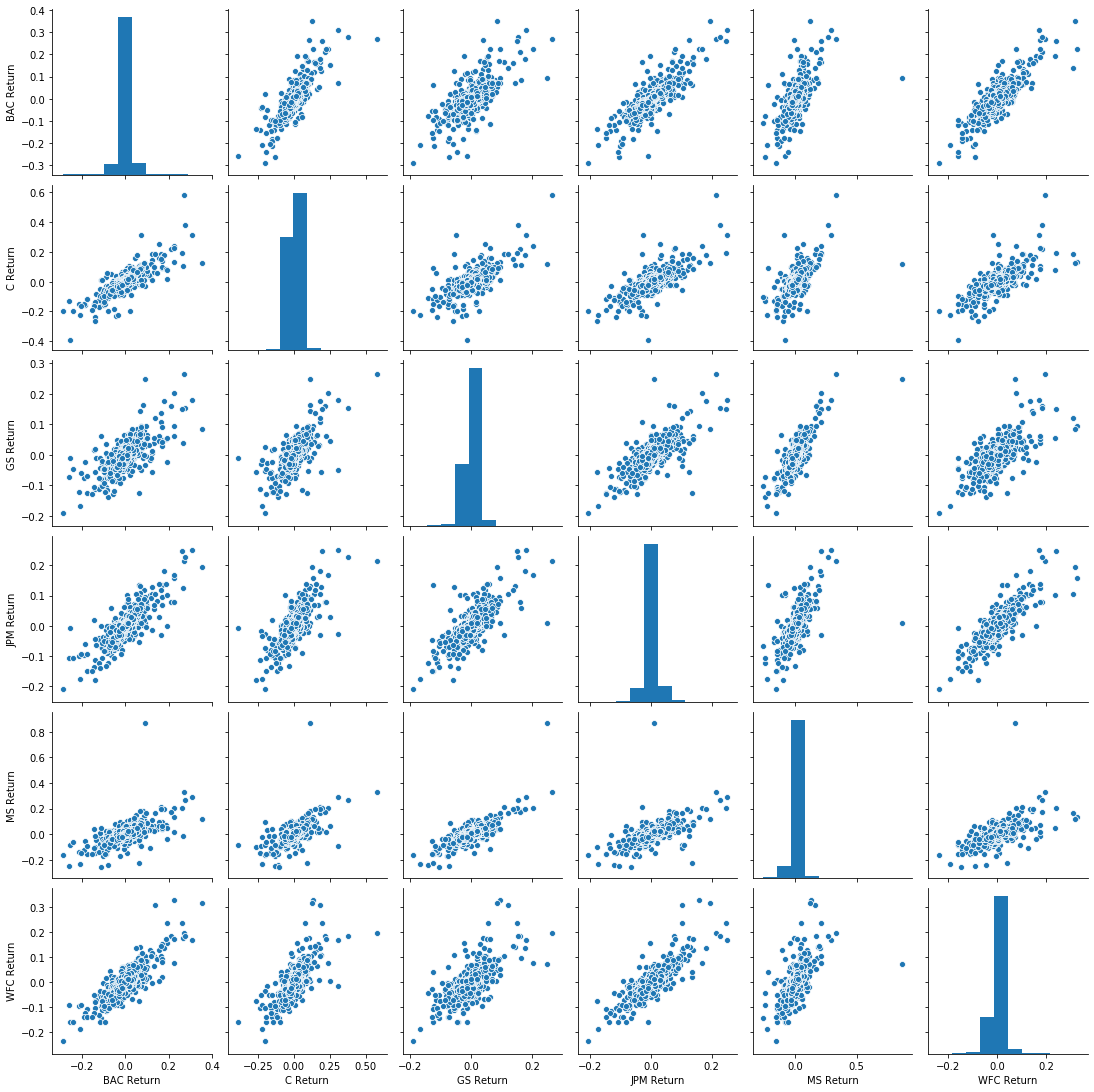

In [29]:
sns.pairplot(returns[1:])

In [30]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [31]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [32]:
returns.std()

BAC Return    0.032594
C Return      0.034536
GS Return     0.023811
JPM Return    0.025196
MS Return     0.033540
WFC Return    0.027530
dtype: float64

In [36]:
returns.loc['2019-01-01':'2020-01-01'].std()

BAC Return    0.014566
C Return      0.015354
GS Return     0.014890
JPM Return    0.011869
MS Return     0.014701
WFC Return    0.012450
dtype: float64

#### Distplot 2015 returns of Morgan Stanley

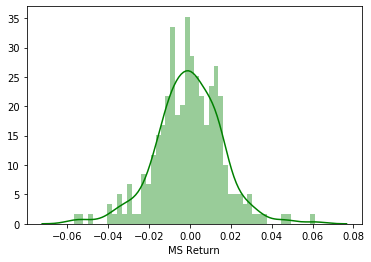

In [37]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], 
             color='green', bins=50)

#### Distplot 2008 returns of CitiGroup

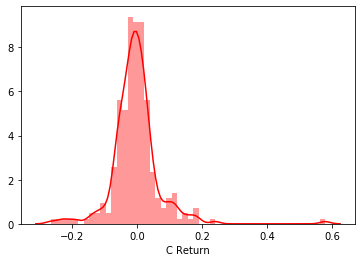

In [38]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], 
             color='red', bins=50)

#### Lineplot of close price of all bank stocks

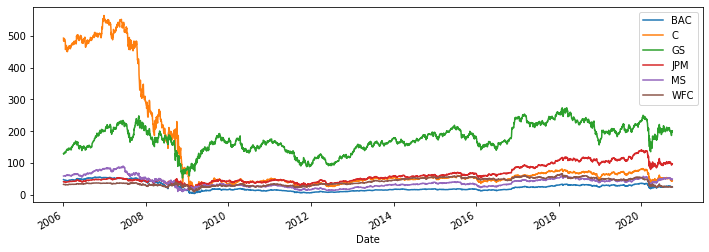

In [40]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

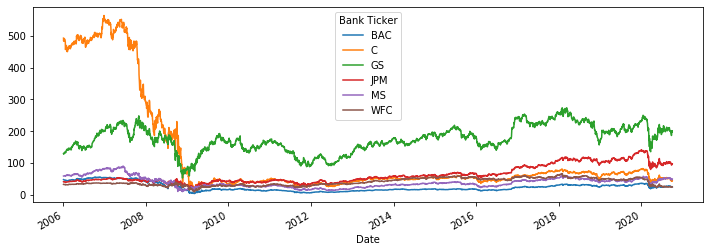

In [42]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

In [43]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

#### 30 day moving average of stocks in 2008

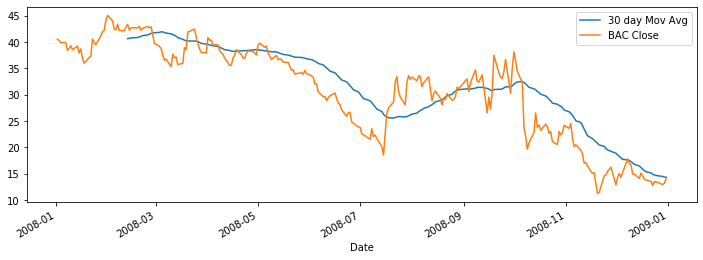

In [45]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

#### Heatmap of close price

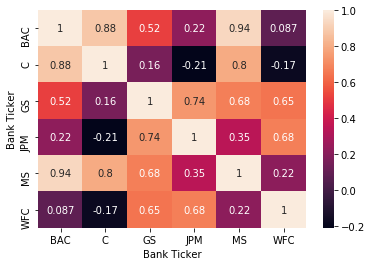

In [47]:
sns.heatmap(bank_stocks.xs(key='Close',
               axis=1,
               level='Stock Info').corr(),
            annot = True)

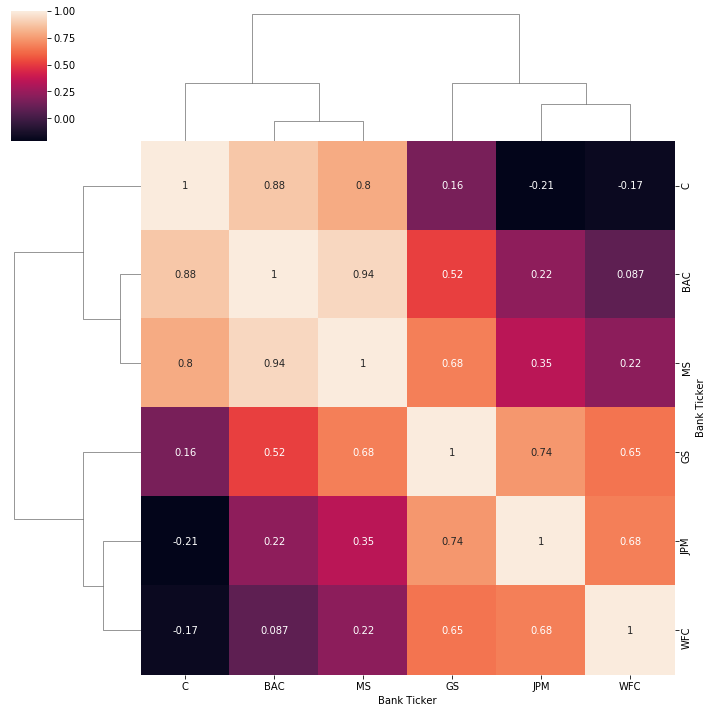

In [48]:
sns.clustermap(bank_stocks.xs(key='Close',
               axis=1,
               level='Stock Info').corr(),
            annot = True)

### Visualizations using cufflinks and plotly

In [49]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [50]:
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

#### candle plot

In [51]:
bac19 = BAC[['Open','High','Low','Close']].loc['2019-01-01':'2020-01-01']
bac19.iplot(kind='candle')

#### simple moving average plot

In [52]:
MS['Close'].loc['2019-01-01':'2020-01-01'].ta_plot(study='sma',periods=[13,21,55])

#### Bollinger band plot

In [53]:
BAC['Close'].loc['2019-01-01':'2020-01-01'].ta_plot(study='boll')

## END!!!